In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [3]:
%matplotlib inline

In [4]:
%pwd

'C:\\Users\\ANKIT-PC'

In [19]:
df_train = pd.read_csv("~/Desktop/Kg Data/train.csv")

In [20]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [21]:
a=df[df['toxic'] ==1]
len(a)

9237

In [23]:
df_train["toxic_label"] = (df_train==1).any(axis=1)

In [24]:
df_train[:30]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_label
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,True
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,False
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,False
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,False
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,False
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0,False
6,87311443,Why can you put English for example on some pl...,0,0,0,0,0,0,False
7,114749757,Guy Fawkes \n\nim a resident in bridgwater and...,0,0,0,0,0,0,False
8,138560519,as far as nicknames go this article is embarra...,0,0,0,0,0,0,False
9,139353149,Woodland Meadows\nGood to hear that you correc...,0,0,0,0,0,0,False


In [44]:
is_toxic =df_train.toxic_label.value_counts()

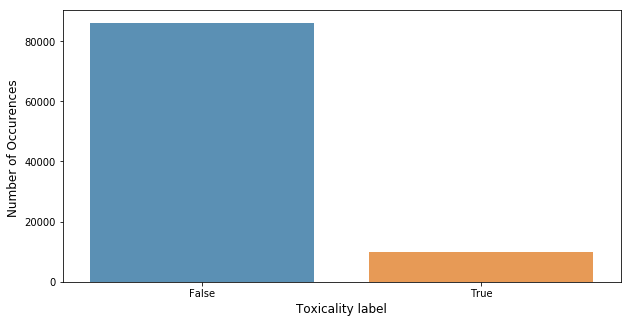

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(is_toxic.index, is_toxic.values, alpha=0.8)
plt.ylabel('Number of Occurences ',fontsize = 12)
plt.xlabel('Toxicality label', fontsize =12)
plt.show()

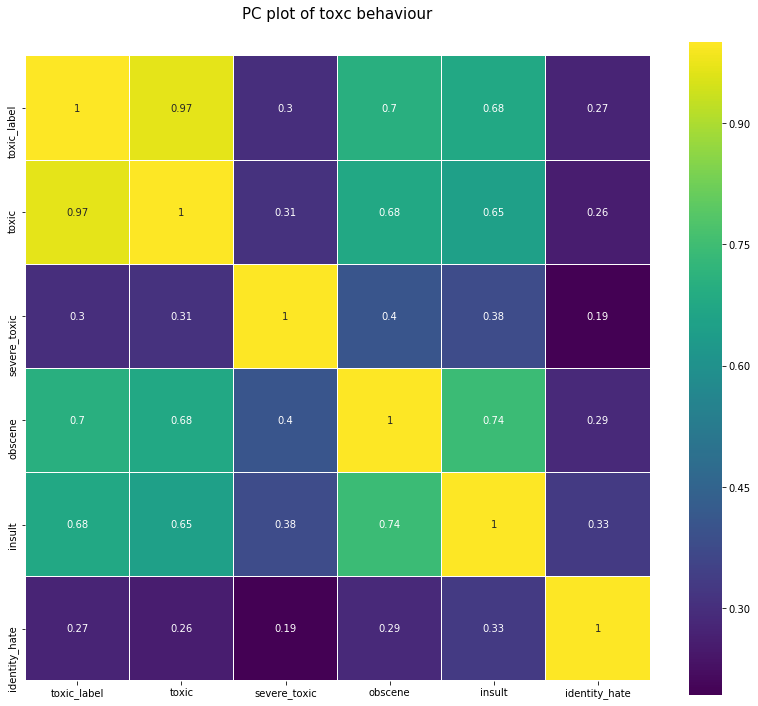

In [49]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('PC plot of toxic behaviour', y =1.05, size =15)
sns.heatmap(df_train[['toxic_label','toxic','severe_toxic','obscene','insult','identity_hate']].astype(float).corr(),linewidths=0.1,
           vmax=1.0, square = True, cmap = colormap, linecolor ='white',annot=True)


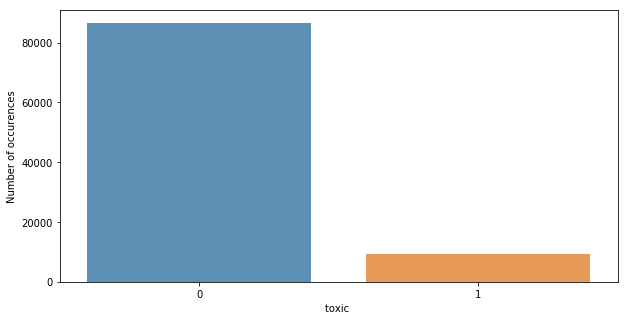

In [52]:
is_toxic = df_train.toxic.value_counts()
plt.figure(figsize = (10,5))
sns.barplot(is_toxic.index,is_toxic.values,alpha=0.8)
plt.ylabel('Number of occurences')
plt.xlabel('toxic ')
plt.show()

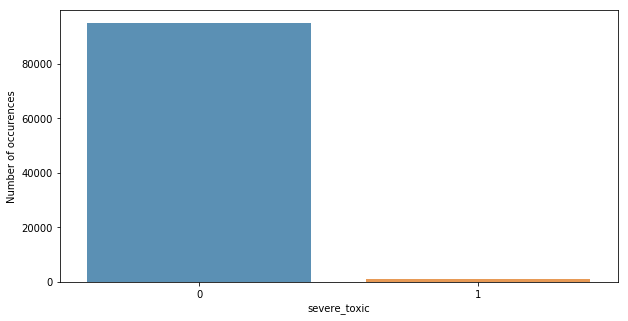

In [54]:
is_toxic = df_train.severe_toxic.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('severe_toxic')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

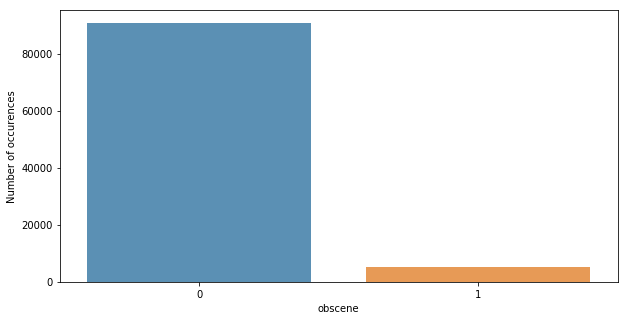

In [55]:
is_toxic = df_train.obscene.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('obscene')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

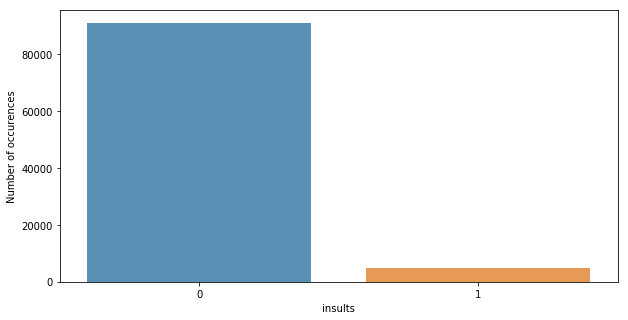

In [57]:
is_toxic = df_train.insult.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('insults')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

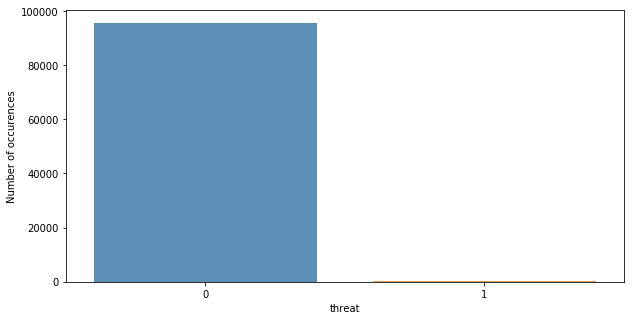

In [58]:
is_toxic = df_train.threat.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('threat')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

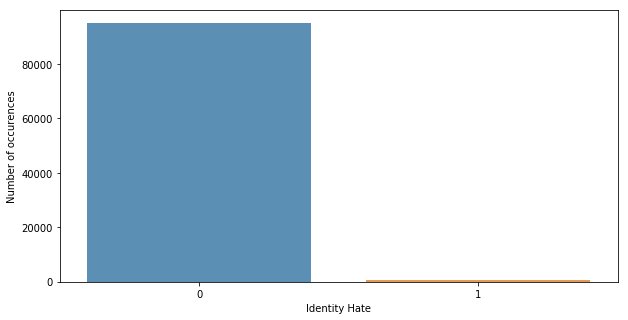

In [59]:
is_toxic = df_train.identity_hate.value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Number of occurences')
plt.xlabel('Identity Hate')
sns.barplot(is_toxic.index, is_toxic.values,alpha=0.8)
plt.show()

In [77]:
train_w = pd.Series(test_var.tolist())

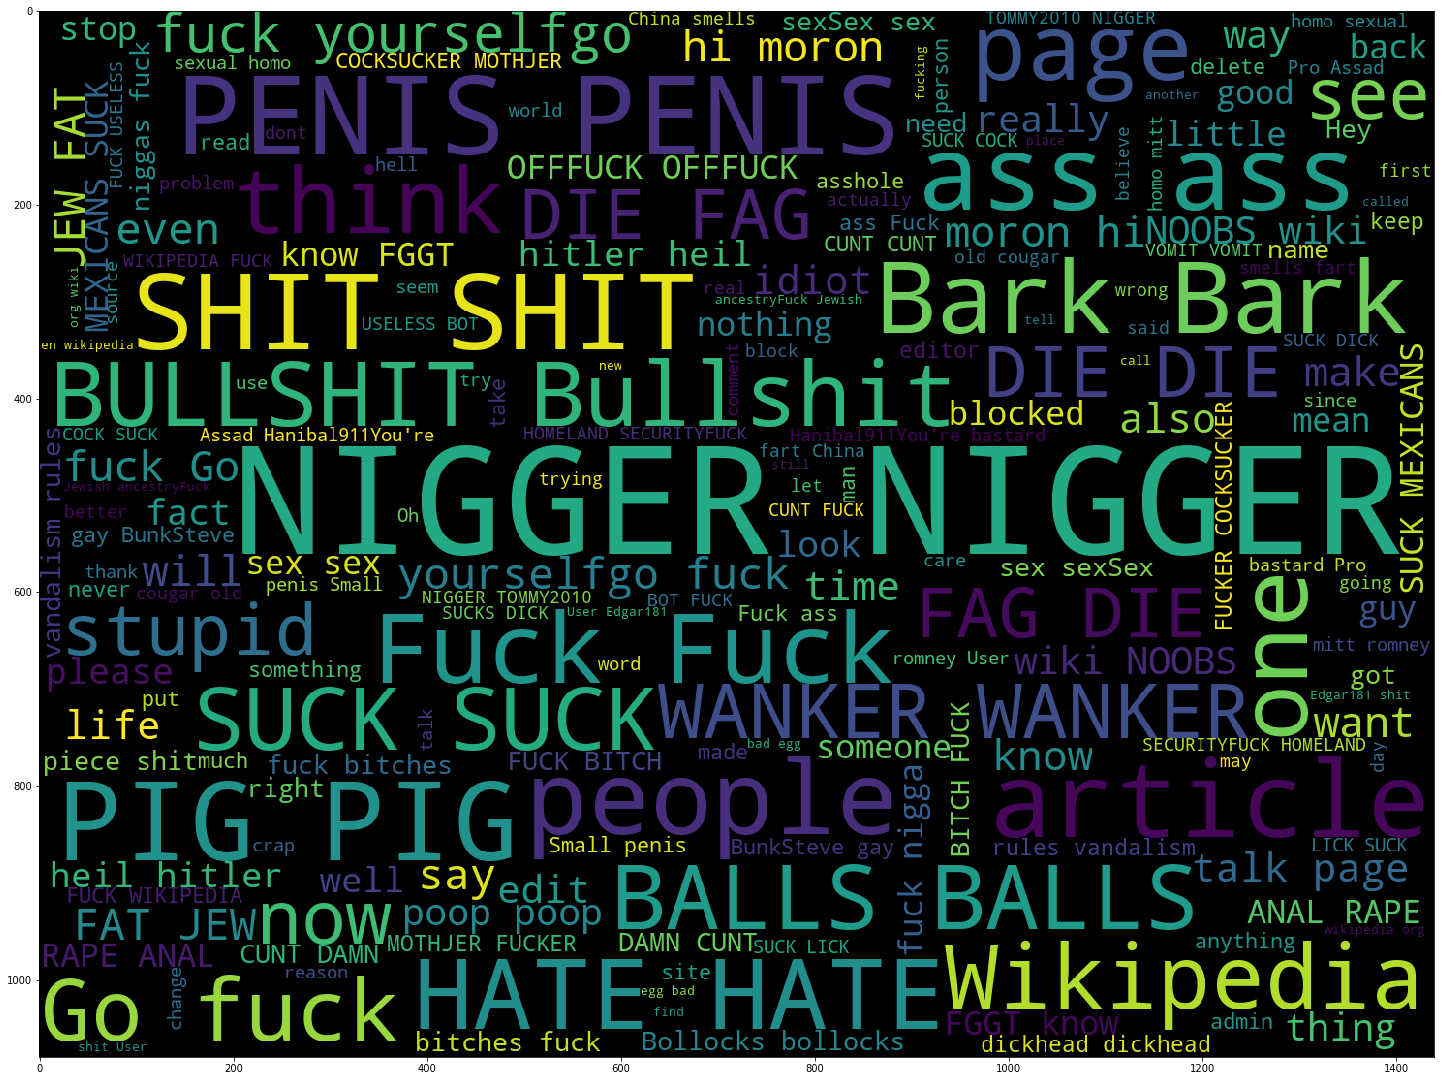

In [79]:
cloud = WordCloud(width=1440,height=1080).generate(" ".join(train_w.astype(str)))
plt.figure(figsize=(25,20))
plt.imshow(cloud)

In [73]:
test_var = df[df_train['toxic_label']==True ]['comment_text']

In [76]:
test_var[:10]

0     Nonsense?  kiss off, geek. what I said is true...
20    Why hasn't Alitalia been removed rom the allia...
26    "\nThe Graceful Slick....\nIs non other than a...
30    "\n\n Stupid? \n\nAs soon as I saw the phrase ...
32    "\nBan one side of an argument by a bullshit n...
39                          Are you gay?? Sound like it
62    and in the program on last night Crime Museum:...
79    "\n\nI didn't call you a ""biased backward yan...
81    "\n\nIt was very constructive you are just ver...
86    "\n\n You know what? Fuck you! I tried to be c...
Name: comment_text, dtype: object